In [76]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('data/netflix_titles.csv')

In [77]:
# Удаление строк с пустыми значениями в ключевых столбцах
df.dropna(subset=['director', 'cast', 'country', 'date_added', 'rating'], inplace=True)

# Удаление лишних пробелов из столбца 'date_added'
df['date_added'] = df['date_added'].str.strip()

# Преобразование столбца 'date_added' в формат даты
df['date_added'] = pd.to_datetime(df['date_added'])

# Выделение года добавления в отдельный столбец 'year_added'
df['year_added'] = df['date_added'].dt.year

# Проверка первых 5 строк
print(df.head())

# Информация о датасете
print(df.info())

   show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24  Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   

                                              country date_added  \
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
8                                      United Kingdom 2021-09-24   
9 

In [78]:
import plotly.graph_objs as go

# Подготовка данных: количество добавленных шоу по годам
year_counts = df['year_added'].value_counts().sort_index()

# Создание столбчатой диаграммы
fig = go.Figure(go.Bar(
    x=year_counts.index,
    y=year_counts.values,
    marker=dict(
        color=year_counts.values,
        coloraxis="coloraxis",
        line=dict(color='black', width=2)
    )
))

# Настройка цветовой оси
fig.update_layout(coloraxis=dict(colorscale='Viridis'))

# Настройка графика
fig.update_layout(
    title=dict(
        text='Количество добавленных шоу по годам',
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    ),
    xaxis=dict(
        title=dict(text='Год добавления', font=dict(size=16)),
        tickangle=315,
        tickfont=dict(size=14),
        showgrid=True,
        gridwidth=2,
        gridcolor='ivory'
    ),
    yaxis=dict(
        title=dict(text='Количество шоу', font=dict(size=16)),
        tickfont=dict(size=14),
        showgrid=True,
        gridwidth=2,
        gridcolor='ivory'
    ),
    width=1000,
    height=700,
    margin=dict(l=20, r=20, t=50, b=50),
    plot_bgcolor='white'
)

# Отображение графика
fig.show()


In [79]:
# Подготовка данных: топ-10 стран по количеству шоу
country_counts = df['country'].value_counts().nlargest(10)

# Создание круговой диаграммы
fig = go.Figure(go.Pie(
    labels=country_counts.index,
    values=country_counts.values,
    marker=dict(
        line=dict(color='black', width=2)
    ),
    textfont=dict(size=16)
))

# Настройка графика
fig.update_layout(
    title=dict(
        text='Топ-10 стран по количеству шоу на Netflix',
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    ),
    width=1000,
    height=700,
    margin=dict(l=20, r=20, t=50, b=50)
)

# Отображение графика
fig.show()


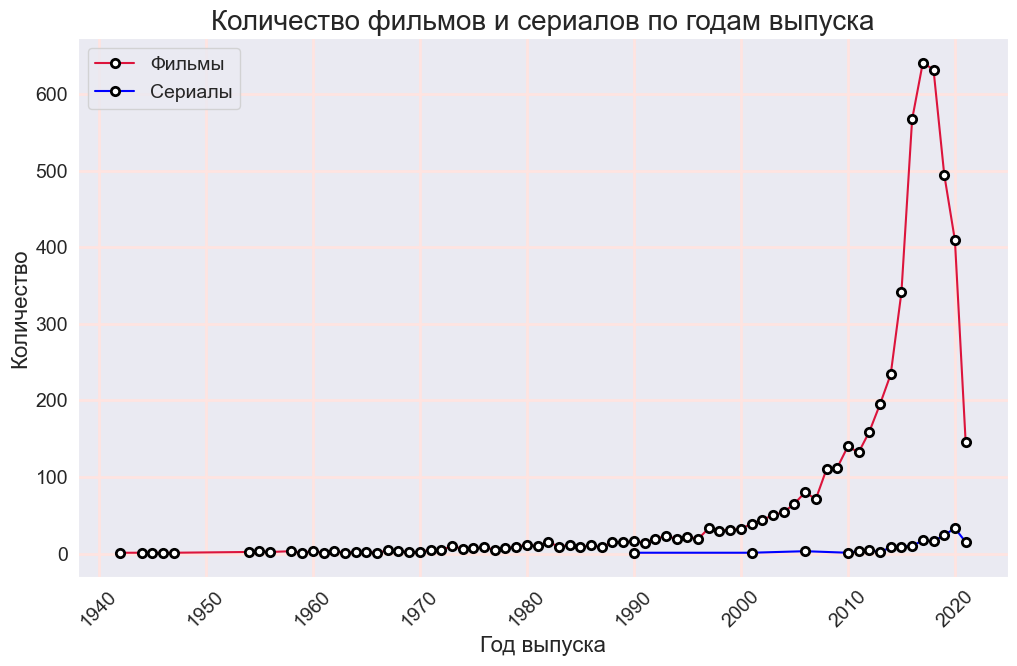

In [80]:
import matplotlib.pyplot as plt

# Подготовка данных: количество фильмов и сериалов по годам выпуска
movies = df[df['type'] == 'Movie']['release_year'].value_counts().sort_index()
tv_shows = df[df['type'] == 'TV Show']['release_year'].value_counts().sort_index()

# Построение графика
plt.figure(figsize=(12, 7))

# Фильмы
plt.plot(
    movies.index,
    movies.values,
    label='Фильмы',
    color='crimson',
    marker='o',
    markerfacecolor='white',
    markeredgecolor='black',
    markeredgewidth=2
)

# Сериалы
plt.plot(
    tv_shows.index,
    tv_shows.values,
    label='Сериалы',
    color='blue',
    marker='o',
    markerfacecolor='white',
    markeredgecolor='black',
    markeredgewidth=2
)

# Настройка графика
plt.title('Количество фильмов и сериалов по годам выпуска', fontsize=20)
plt.xlabel('Год выпуска', fontsize=16)
plt.ylabel('Количество', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.grid(color='mistyrose', linewidth=2)
plt.legend(fontsize=14)

# Отображение графика
plt.show()


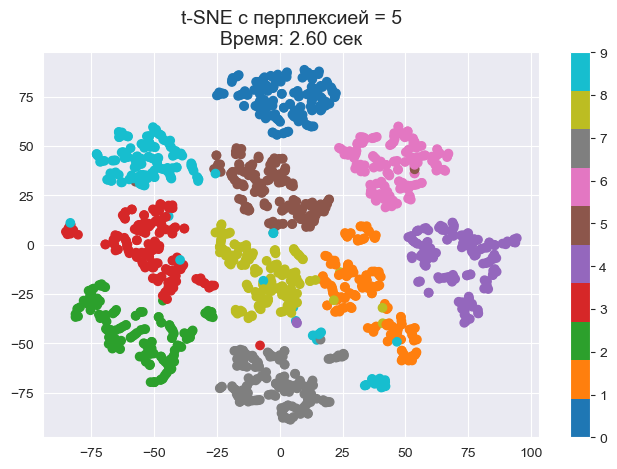

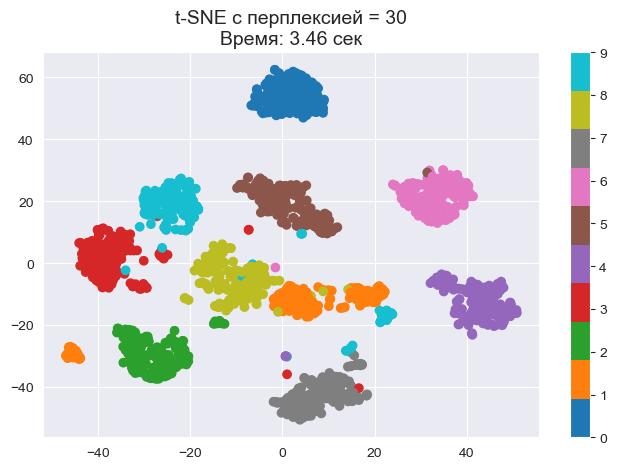

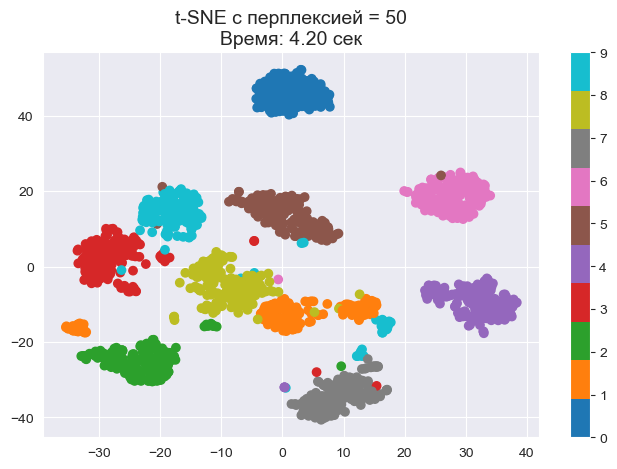

In [81]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time 

# Загрузка данных MNIST
digits = load_digits()
X = digits.data
y = digits.target

# Значения перплексии для анализа
perplexities = [5, 30, 50]

for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    start_time = time.time()
    X_embedded = tsne.fit_transform(X)
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Визуализация
    plt.figure(figsize=(8, 5))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10')
    plt.colorbar()
    plt.title(f't-SNE с перплексией = {perp}\nВремя: {elapsed_time:.2f} сек', fontsize=14)
    plt.show()


C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



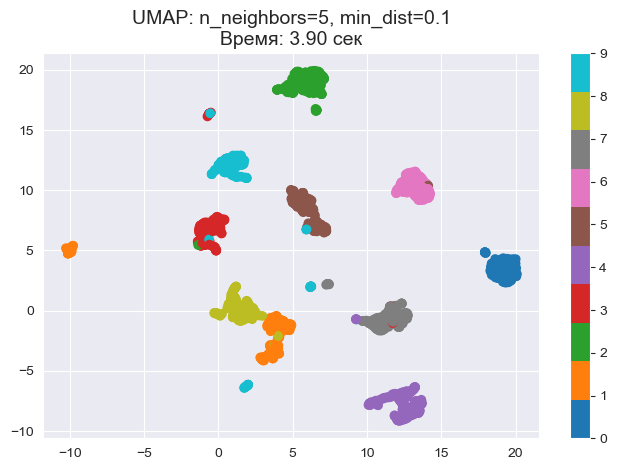

C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



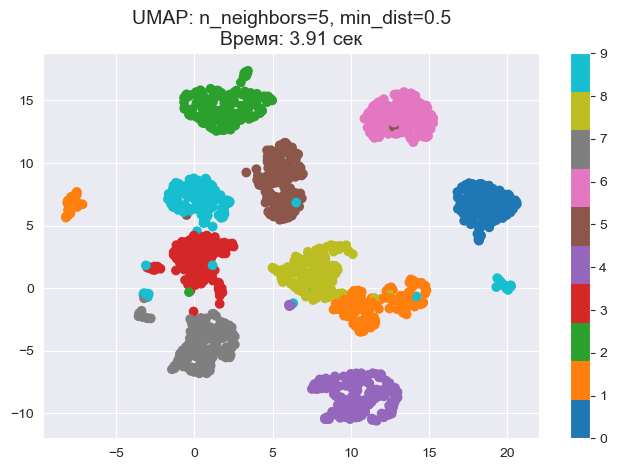

C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



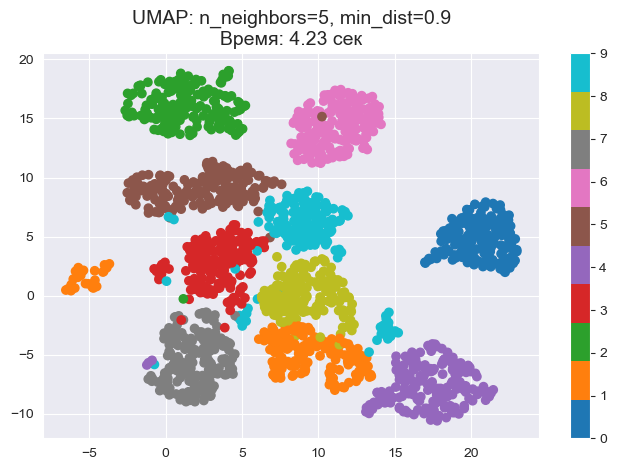

C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



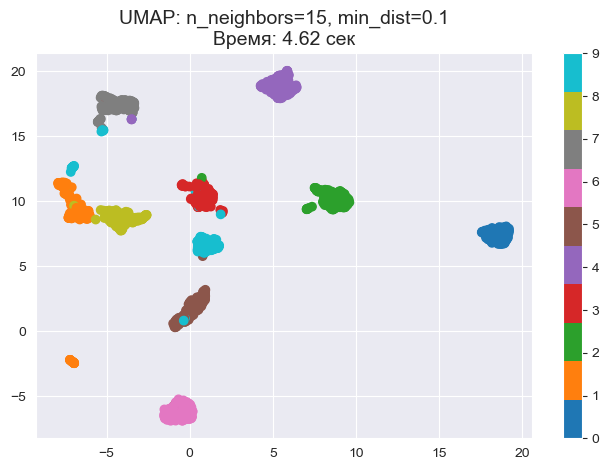

C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



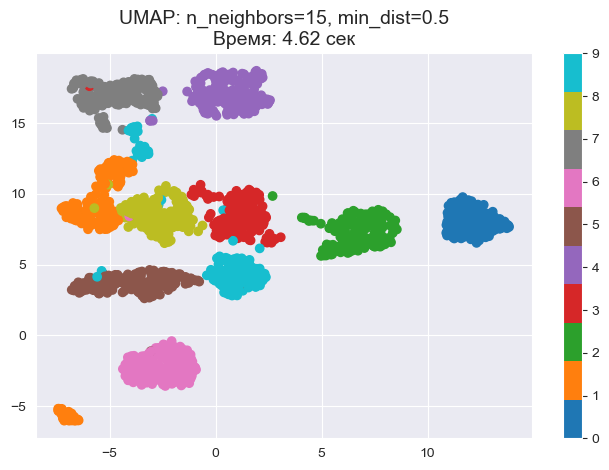

C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



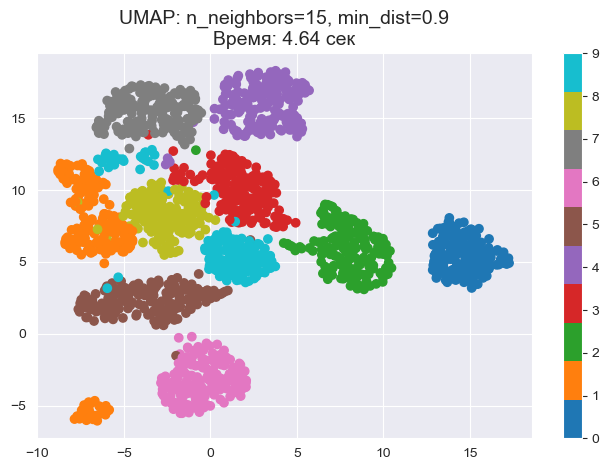

C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



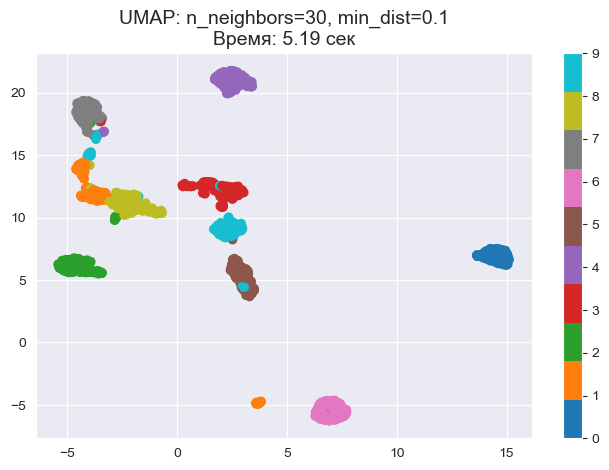

C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



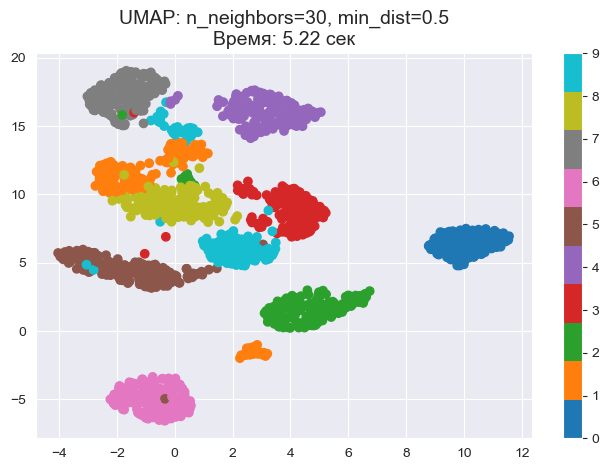

C:\Users\ursus\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



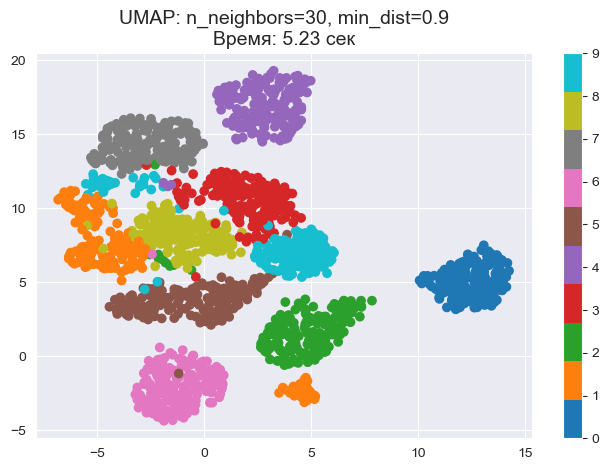

In [82]:
import umap

# Параметры для анализа
n_neighbors_list = [5, 15, 30]
min_dist_list = [0.1, 0.5, 0.9]

for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
        start_time = time.time()
        X_umap = reducer.fit_transform(X)
        end_time = time.time()
        elapsed_time = end_time - start_time

        # Визуализация
        plt.figure(figsize=(8, 5))
        plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10')
        plt.colorbar()
        plt.title(f'UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}\nВремя: {elapsed_time:.2f} сек', fontsize=14)
        plt.show()
